In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [179]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [180]:
df1.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

# DATA CLEANING

### Grouping the Cell for finding ditinct Area Types

In [181]:
df1.groupby('area_type').agg('count')

availability  location  size  society  total_sqft  bath  \
area_type                                                                       
Built-up  Area                2418      2418  2418     1215        2418  2410   
Carpet  Area                    87        87    87       54          87    87   
Plot  Area                    2025      2025  2009      311        2025  2009   
Super built-up  Area          8790      8789  8790     6238        8790  8741   

                      balcony  price  
area_type                             
Built-up  Area           2310   2418  
Carpet  Area               82     87  
Plot  Area               1837   2025  
Super built-up  Area     8482   8790

In [182]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [183]:
df1.groupby('size').agg('count')

area_type  availability  location  society  total_sqft  bath  \
size                                                                       
1 BHK             538           538       538      361         538   531   
1 Bedroom         105           105       105        0         105   105   
1 RK               13            13        13       10          13    13   
10 BHK              2             2         2        0           2     2   
10 Bedroom         12            12        12        1          12    12   
11 BHK              2             2         2        1           2     2   
11 Bedroom          2             2         2        0           2     2   
12 Bedroom          1             1         1        0           1     1   
13 BHK              1             1         1        0           1     1   
14 BHK              1             1         1        0           1     1   
16 BHK              1             1         1        0           1     1   
18 Bedroom          1             1         1        1           1     1   
19 BHK              1             1         1        0           1     1   
2 BHK            5199          5199      5199     3439        5199  5198   
2 Bedroom         329           329       329       16         329   329   
27 BHK              1             1         1        0           1     1   
3 BHK            4310          4310      4309     3154        4310  4287   
3 Bedroom         547           547       547      128         547   546   
4 BHK             591           591       591      416         591   577   
4 Bedroom         826           826       826      219         826   818   
43 Bedroom          1             1         1        0           1     1   
5 BHK              59            59        59       23          59    57   
5 Bedroom         297           297       297       22         297   296   
6 BHK              30            30        30        5          30    30   
6 Bedroom         191           191       191        4         191   191   
7 BHK              17            17        17        1          17    17   
7 Bedroom          83            83        83        0          83    83   
8 BHK               5             5         5        0           5     5   
8 Bedroom          84            84        84        1          84    84   
9 BHK               8             8         8        1           8     8   
9 Bedroom          46            46        46        2          46    46   

            balcony  price  
size                        
1 BHK           530    538  
1 Bedroom       105    105  
1 RK             13     13  
10 BHK            0      2  
10 Bedroom        3     12  
11 BHK            1      2  
11 Bedroom        2      2  
12 Bedroom        1      1  
13 BHK            1      1  
14 BHK            1      1  
16 BHK            0      1  
18 Bedroom        0      1  
19 BHK            0      1  
2 BHK          5152   5199  
2 Bedroom       328    329  
27 BHK            1      1  
3 BHK          4129   4310  
3 Bedroom       527    547  
4 BHK           489    591  
4 Bedroom       749    826  
43 Bedroom        1      1  
5 BHK            36     59  
5 Bedroom       263    297  
6 BHK            23     30  
6 Bedroom       169    191  
7 BHK            16     17  
7 Bedroom        69     83  
8 BHK             3      5  
8 Bedroom        65     84  
9 BHK             5      8  
9 Bedroom        29     46

In [184]:
# To Drop the important Columns
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2

location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]

In [185]:
# Checking Null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [186]:
# Dropping Null values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [187]:
# Finding unique values from specified column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [188]:
# Lambda Fucnction to change all the bedrooms to BHK's
df3["bhk"] = df3["size"].apply(lambda x : int(x.split(" ")[0]))
df3.head()

/Users/dhyanshah/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [189]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [190]:
df3[df3.bhk>29]

location        size total_sqft  bath  price  bhk
4684  Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [191]:
'''
As you can see that the data inside the Sqft column is not unifrom so we need to clean the data according to 
that and make it uniform
'''
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [192]:
yz = "34.46Sq. Meter"
is_float(yz)

False

In [193]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [194]:
'''
A Function is made to convert 2300-3000 these type of value to their respective average values
'''
def makeTotalSqftUniform(x):
    token = x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [195]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(makeTotalSqftUniform)
df4 = df4[df4.total_sqft.notnull()]
df4

location       size  total_sqft  bath   price  bhk
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2
...                         ...        ...         ...   ...     ...  ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5
13316             Richards Town      4 BHK      3600.0   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1

[13200 rows x 6 columns]

# FEATURE ENGINEERING

In [196]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [197]:
len(df5.location.unique())

1298

In [198]:
# Examine the Location on the basis of counts and decide a comman thresholddf5.location = df5.location.apply(lambda x: x.strip())
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [199]:
# Examine the Location on the basis of counts and decide a comman threshold
# df5.location = df5.location.apply(lambda x: x.strip())
# location_stats = df5['location'].value_counts(ascending=False)
# location_stats

In [200]:
len(location_stats[location_stats<=10])

1047

In [201]:
locationLessthan10Houses = location_stats[location_stats<=10]
locationLessthan10Houses

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [202]:
df5.location = df5.location.apply(lambda x : 'Other' if x in locationLessthan10Houses else x)
len(df5.location.unique())

241

In [140]:
df5[df5.location == 'Other']

location       size  total_sqft  bath   price  bhk  price_per_sqft
9        Other  6 Bedroom      1020.0   6.0  370.00    6    36274.509804
18       Other      3 BHK      2770.0   4.0  290.00    3    10469.314079
19       Other      2 BHK      1100.0   2.0   48.00    2     4363.636364
25       Other      3 BHK      1250.0   3.0   56.00    3     4480.000000
42       Other      1 BHK       600.0   1.0   38.00    1     6333.333333
...        ...        ...         ...   ...     ...  ...             ...
13291    Other  1 Bedroom       812.0   1.0   26.00    1     3201.970443
13292    Other      3 BHK      1440.0   2.0   63.93    3     4439.583333
13302    Other      2 BHK      1075.0   2.0   48.00    2     4465.116279
13306    Other  4 Bedroom      1200.0   5.0  325.00    4    27083.333333
13316    Other      4 BHK      3600.0   5.0  400.00    4    11111.111111

[2872 rows x 7 columns]

# OUTLIER DATA ANALYSIS

### Bedroom Ouliers

In [203]:
df5.shape

(13200, 7)

In [205]:
df5[(df5.total_sqft/df5.bhk)<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 Other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                Other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [206]:
df6 = df5[~((df5.total_sqft/df5.bhk)<300)]
df6.shape

(12456, 7)

### Outlier Reduction using Standard Deviation

In [207]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [208]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [209]:
df7

location   size  total_sqft  bath   price  bhk  \
0      1st Block Jayanagar  4 BHK      2850.0   4.0  428.00    4   
1      1st Block Jayanagar  3 BHK      1630.0   3.0  194.00    3   
2      1st Block Jayanagar  3 BHK      1875.0   2.0  235.00    3   
3      1st Block Jayanagar  3 BHK      1200.0   2.0  130.00    3   
4      1st Block Jayanagar  2 BHK      1235.0   2.0  148.00    2   
...                    ...    ...         ...   ...     ...  ...   
10237         Yeshwanthpur  3 BHK      1676.0   3.0   92.13    3   
10238         Yeshwanthpur  3 BHK      2503.0   3.0  138.00    3   
10239         Yeshwanthpur  3 BHK      1855.0   3.0  135.00    3   
10240         Yeshwanthpur  3 BHK      1876.0   3.0  160.00    3   
10241         Yeshwanthpur  3 BHK      1675.0   3.0   92.13    3   

       price_per_sqft  
0        15017.543860  
1        11901.840491  
2        12533.333333  
3        10833.333333  
4        11983.805668  
...               ...  
10237     5497.016706  
10238     5513.383939  
10239     7277.628032  
10240     8528.784648  
10241     5500.298507  

[10242 rows x 7 columns]

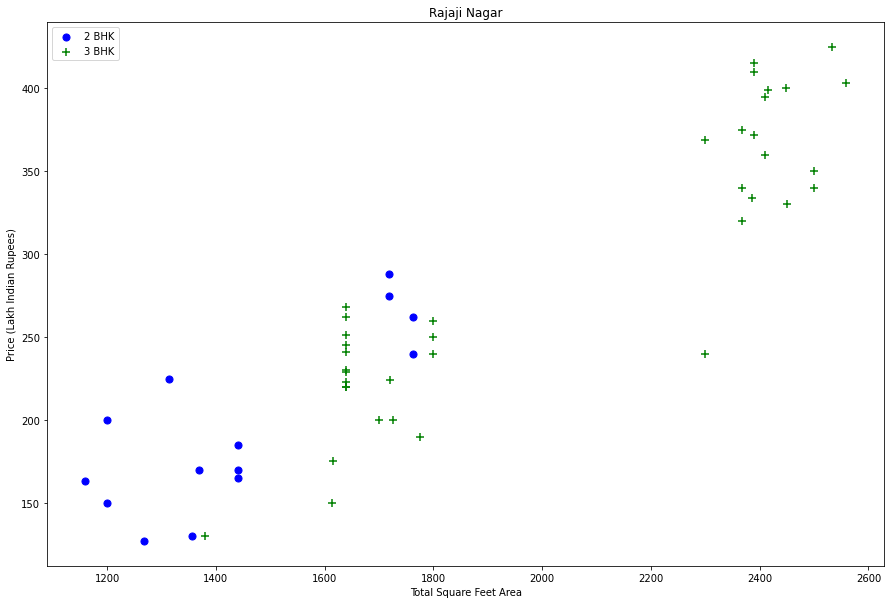

In [210]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [212]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

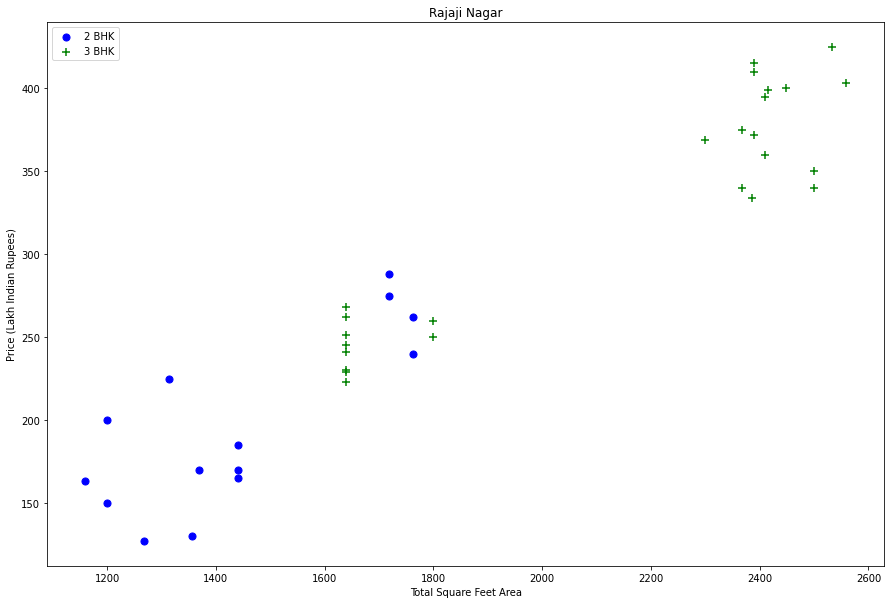

In [213]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [214]:
df8

location       size  total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
...                    ...        ...         ...   ...    ...  ...   
10231         Yeshwanthpur      2 BHK      1195.0   2.0  100.0    2   
10232         Yeshwanthpur      3 BHK      1692.0   3.0  108.0    3   
10234         Yeshwanthpur  6 Bedroom      2500.0   5.0  185.0    6   
10239         Yeshwanthpur      3 BHK      1855.0   3.0  135.0    3   
10240         Yeshwanthpur      3 BHK      1876.0   3.0  160.0    3   

       price_per_sqft  
0        15017.543860  
1        11901.840491  
2        12533.333333  
3        10833.333333  
4        11983.805668  
...               ...  
10231     8368.200837  
10232     6382.978723  
10234     7400.000000  
10239     7277.628032  
10240     8528.784648  

[7317 rows x 7 columns]

Text(0, 0.5, 'Count')

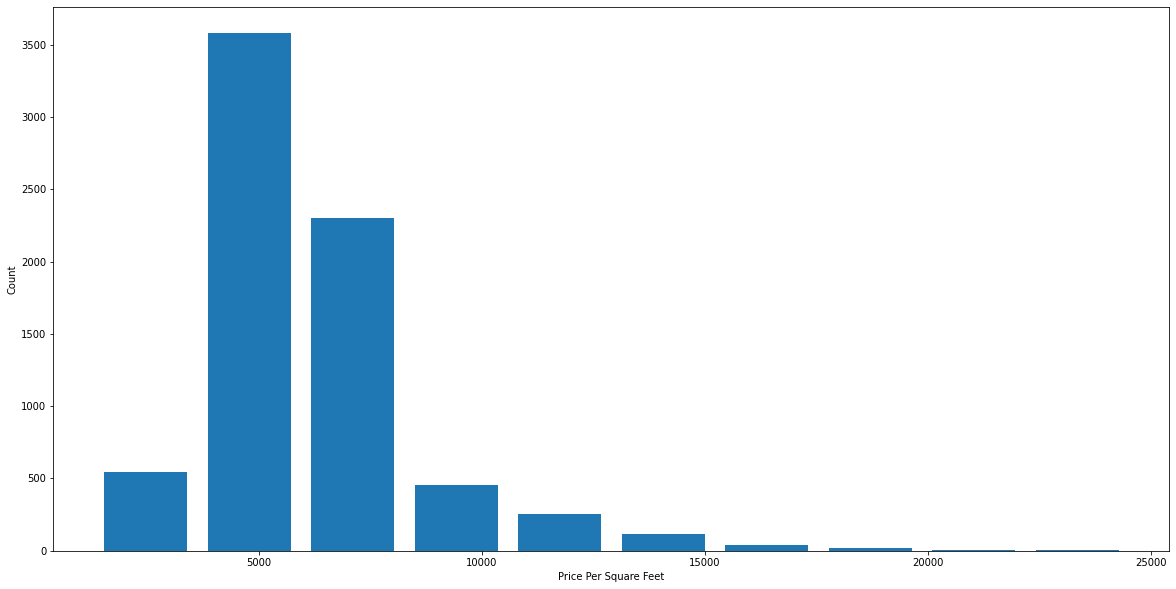

In [215]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

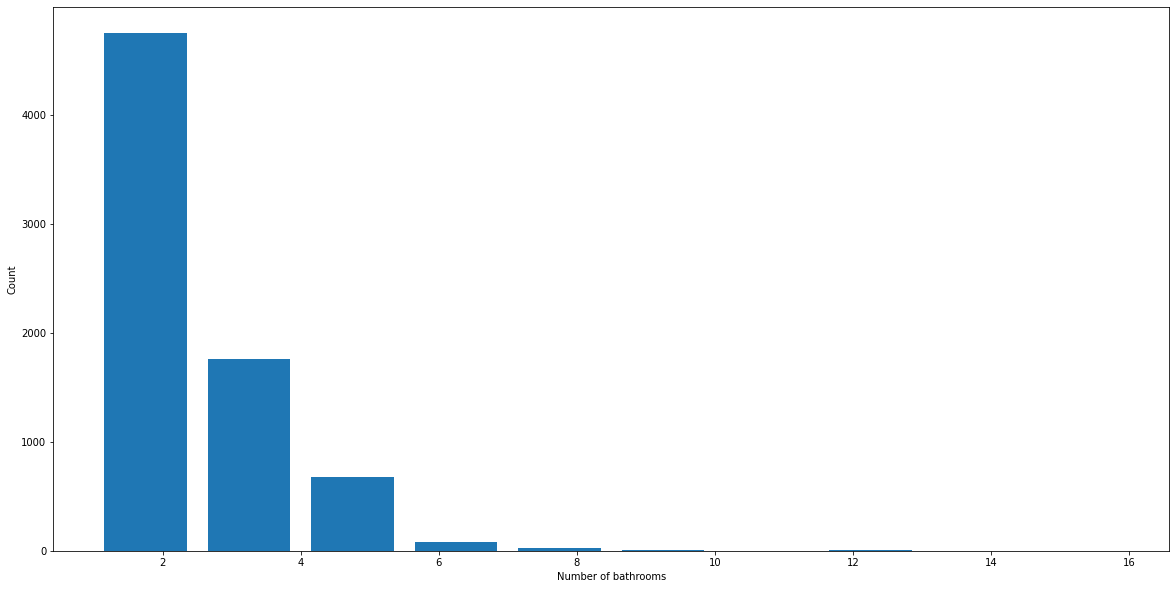

In [216]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [218]:
df8.shape

(7317, 7)

In [219]:
df9 = df8[df8.bath<df8.bhk+2]
df9

location       size  total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
...                    ...        ...         ...   ...    ...  ...   
10231         Yeshwanthpur      2 BHK      1195.0   2.0  100.0    2   
10232         Yeshwanthpur      3 BHK      1692.0   3.0  108.0    3   
10234         Yeshwanthpur  6 Bedroom      2500.0   5.0  185.0    6   
10239         Yeshwanthpur      3 BHK      1855.0   3.0  135.0    3   
10240         Yeshwanthpur      3 BHK      1876.0   3.0  160.0    3   

       price_per_sqft  
0        15017.543860  
1        11901.840491  
2        12533.333333  
3        10833.333333  
4        11983.805668  
...               ...  
10231     8368.200837  
10232     6382.978723  
10234     7400.000000  
10239     7277.628032  
10240     8528.784648  

[7239 rows x 7 columns]

# One Hot Encoding

In [220]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

location  total_sqft  bath  price  bhk
0      1st Block Jayanagar      2850.0   4.0  428.0    4
1      1st Block Jayanagar      1630.0   3.0  194.0    3
2      1st Block Jayanagar      1875.0   2.0  235.0    3
3      1st Block Jayanagar      1200.0   2.0  130.0    3
4      1st Block Jayanagar      1235.0   2.0  148.0    2
...                    ...         ...   ...    ...  ...
10231         Yeshwanthpur      1195.0   2.0  100.0    2
10232         Yeshwanthpur      1692.0   3.0  108.0    3
10234         Yeshwanthpur      2500.0   5.0  185.0    6
10239         Yeshwanthpur      1855.0   3.0  135.0    3
10240         Yeshwanthpur      1876.0   3.0  160.0    3

[7239 rows x 5 columns]

In [221]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  

[3 rows x 241 columns]

In [222]:
df11 = pd.concat([df10,dummies.drop('Other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [223]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 244 columns]

In [224]:
df12.shape

(7239, 244)

# Machine Learning Model

In [225]:
X = df12.drop('price',axis="columns")
X

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0    4                    1                   0   
1          1630.0   3.0    3                    1                   0   
2          1875.0   2.0    3                    1                   0   
3          1200.0   2.0    3                    1                   0   
4          1235.0   2.0    2                    1                   0   
...           ...   ...  ...                  ...                 ...   
10231      1195.0   2.0    2                    0                   0   
10232      1692.0   3.0    3                    0                   0   
10234      2500.0   5.0    6                    0                   0   
10239      1855.0   3.0    3                    0                   0   
10240      1876.0   3.0    3                    0                   0   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                              0                     0                     0   
1                              0                     0                     0   
2                              0                     0                     0   
3                              0                     0                     0   
4                              0                     0                     0   
...                          ...                   ...                   ...   
10231                          0                     0                     0   
10232                          0                     0                     0   
10234                          0                     0                     0   
10239                          0                     0                     0   
10240                          0                     0                     0   

       5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                       0                   0  ...            0   
1                       0                   0  ...            0   
2                       0                   0  ...            0   
3                       0                   0  ...            0   
4                       0                   0  ...            0   
...                   ...                 ...  ...          ...   
10231                   0                   0  ...            0   
10232                   0                   0  ...            0   
10234                   0                   0  ...            0   
10239                   0                   0  ...            0   
10240                   0                   0  ...            0   

       Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                         0                   0            0           0   
1                         0                   0            0           0   
2                         0                   0            0           0   
3                         0                   0            0           0   
4                         0                   0            0           0   
...                     ...                 ...          ...         ...   
10231                     0                   0            0           0   
10232                     0                   0            0           0   
10234                     0                   0            0           0   
10239                     0                   0            0           0   
10240                     0                   0            0           0   

       Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0                   0          0                   0            0   
1                   0          0                   0            0   
2                   0          0                   0            0   
3                   0          0                   0            0   
4                   0          0                   0            0   
...               ...        ...     

In [226]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10231    100.0
10232    108.0
10234    185.0
10239    135.0
10240    160.0
Name: price, Length: 7239, dtype: float64

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [228]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.869707744786488

In [229]:
## K Fold Cross Validation for many other algorithms

In [230]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85828778, 0.84336113, 0.79796392, 0.83935442, 0.87210932])

In [232]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


/Users/dhyanshah/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/dhyanshah/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

/Users/dhyanshah/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


model  best_score                               best_params
0  linear_regression    0.842215                      {'normalize': False}
1              lasso    0.709768       {'alpha': 1, 'selection': 'random'}
2      decision_tree    0.665938  {'criterion': 'mse', 'splitter': 'best'}

# Testing

In [245]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0] 

In [246]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Users/dhyanshah/opt/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.97216916200085

# Dumping my model in Pickle File

In [248]:
import pickle
with open('banglore_house_price_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Dumping in JSON file to store COlumns Information

In [249]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))